Cleaning procedure.

In [2]:
import pandas as pd

df = pd.read_csv(
            "/Users/edwardsujono/Python_Project/h1b_visa_analytic/data/h1b_kaggle.csv"
)

We need to delete WITHDRAWN status from the data collections. WITHDRAWN status means that particular user has withdrawn their visa request before the result is decided, so that kind of data is unrelevant to our analysis. 
Latitude and Longitude are not relevant to our analysis as well since the value is continuos.

In [3]:
df.drop(df[df.CASE_STATUS == "WITHDRAWN"].index, inplace=True)
df.drop("lon", 1, inplace=True)
df.drop("lat", 1, inplace=True)

Remove all the empty column

In [ ]:
df.drop(df[df.CASE_STATUS == ""].index, inplace=True)
df.drop(df[df.EMPLOYER_NAME == ""].index, inplace=True)
df.drop(df[df.SOC_NAME == ""].index, inplace=True)
df.drop(df[df.JOB_TITLE == ""].index, inplace=True)
df.drop(df[df.FULL_TIME_POSITION == ""].index, inplace=True)
df.drop(df[df.PREVAILING_WAGE < 0].index, inplace=True)
df.drop(df[df.WORKSITE == ""].index, inplace=True)

Inner join with the real SOC data because several data in SOC_NAME is rubbish

In [ ]:
df_soc = pd.read_csv(
            "/Users/edwardsujono/Python_Project/h1b_visa_analytic/data/soc_code.csv"
        )
result = pd.merge(df,  df_soc[["Code", "Title"]], left_on="SOC_NAME", right_on="Title", how="inner")
result.to_csv("/Users/edwardsujono/Python_Project/h1b_visa_analytic/data/clean_data.csv")

Plot each year datas. check CERTIFIED and CERTIFED_WITHDRAWN

[[8698, 237394], [25483, 306333], [31942, 366902], [34382, 441667]]


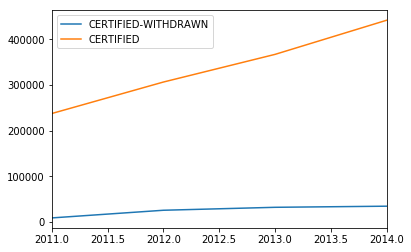

In [7]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

result = pd.read_csv(
                "/Users/edwardsujono/Python_Project/h1b_visa_analytic/data/clean_data.csv"
)
years = result.groupby(["YEAR"]).mean().index.values
datas = []
statuses = ["CERTIFIED-WITHDRAWN", "CERTIFIED"]

for year in years:
    datas.append([])

for i in xrange(len(years)):
    for status in statuses:

        year_data = result.YEAR == years[i]
        status_data = result.CASE_STATUS == status

        combine_data = result[year_data & status_data]
        datas[i].append(len(combine_data.index.values))

plotting = pd.DataFrame(datas, index=years, columns=statuses)
print datas
plt.figure()
plotting.plot()